More of the tutorial: https://colab.research.google.com/drive/1OKciI0ETCpWdRjP-VOGpBulDJojYfgWv

In [ ]:
# Clone the repo
!git clone https://github.com/cleardusk/3DDFA_V2.git
!cd 3DDFA_V2

In [ ]:
#Instal required modules
%cd 3DDFA_V2
!pip install -r "requirements.txt"

In [ ]:
# Build the cython version of NMS, Sim3DR, and the faster mesh render
!sh ./build.sh

In [ ]:
#demo running on webcam
!python3 demo_webcam_smooth.py --onnx

In [56]:
import cv2
import yaml

from FaceBoxes import FaceBoxes
from TDDFA import TDDFA
from utils.functions import draw_landmarks
from utils.render import render
from utils.depth import depth

import matplotlib.pyplot as plt

In [57]:
# load config
cfg = yaml.load(open('configs/mb1_120x120.yml'), Loader=yaml.SafeLoader)

# Init FaceBoxes and TDDFA, recommend using onnx flag
onnx_flag = True  # or True to use ONNX to speed up
if onnx_flag:
    !pip install onnxruntime
    
    import os
    os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
    os.environ['OMP_NUM_THREADS'] = '4'
    from FaceBoxes.FaceBoxes_ONNX import FaceBoxes_ONNX
    from TDDFA_ONNX import TDDFA_ONNX

    face_boxes = FaceBoxes_ONNX()
    tddfa = TDDFA_ONNX(**cfg)
else:
    face_boxes = FaceBoxes()
    tddfa = TDDFA(gpu_mode=False, **cfg)

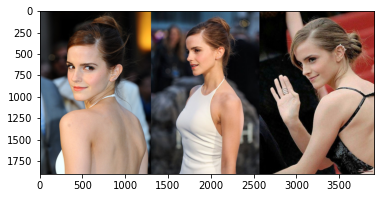

In [58]:
# given an image path or the image url

# img_fp = 'examples/inputs/emma.jpg'
# img = cv2.imread(img_fp)
# plt.imshow(img[..., ::-1])

img_url = 'https://raw.githubusercontent.com/cleardusk/3DDFA_V2/master/examples/inputs/emma.jpg'
img = io.imread(img_url)
plt.imshow(img)

img = img[..., ::-1]  # RGB -> BGR

In [59]:
# face detection
boxes = face_boxes(img)
print(f'Detect {len(boxes)} faces')
print(boxes)

Detect 3 faces
[[1699.8103, 278.4466, 2057.8765, 762.2303, 0.999949], [2999.4954, 305.0812, 3428.5447, 900.97614, 0.99989545], [317.43112, 399.97055, 792.7798, 1048.0317, 0.99988735]]


In [60]:
# regress 3DMM params
param_lst, roi_box_lst = tddfa(img, boxes)

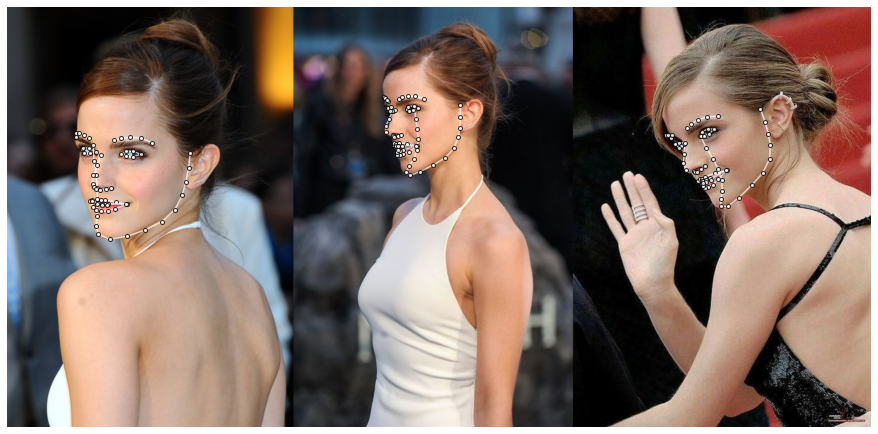

In [61]:
# reconstruct vertices and visualizing sparse landmarks
dense_flag = False
ver_lst = tddfa.recon_vers(param_lst, roi_box_lst, dense_flag=dense_flag)
draw_landmarks(img, ver_lst, dense_flag=dense_flag)

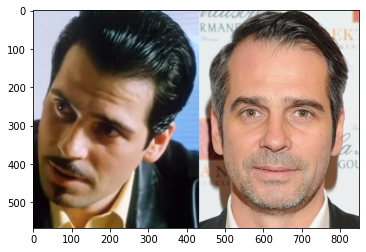

In [62]:
img_url = 'examples/inputs/asd.jpg'
img = io.imread(img_url)
plt.imshow(img)

img = img[..., ::-1]  # RGB -> BGR

In [63]:
boxes = face_boxes(img)
print(f'Detect {len(boxes)} faces')
print(boxes)

Detect 2 faces
[[489.29343, 82.89397, 782.56177, 517.1453, 0.9992267], [15.291658, 119.43138, 315.0106, 534.4636, 0.9958627]]


In [64]:
# regress 3DMM params
param_lst, roi_box_lst = tddfa(img, boxes)

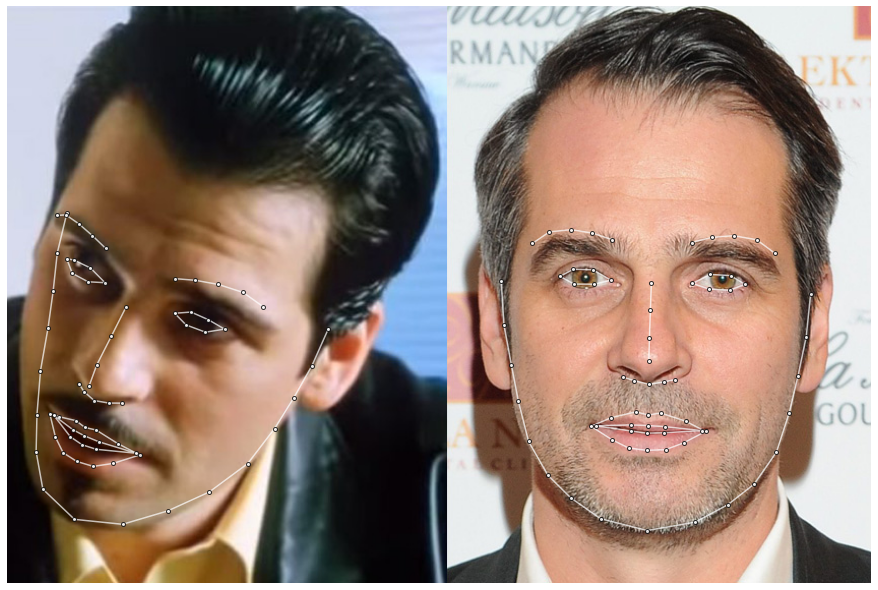

In [65]:
# reconstruct vertices and visualizing sparse landmarks
dense_flag = False
ver_lst = tddfa.recon_vers(param_lst, roi_box_lst, dense_flag=dense_flag)
draw_landmarks(img, ver_lst, dense_flag=dense_flag)